In [1]:
import pandas as pd
import requests
import logging
import time
from functools import reduce

# filter out unnecessary warnings
logging.getLogger("requests").setLevel(logging.WARNING)
logging.getLogger("urllib3").setLevel(logging.WARNING)

# Setup the API
api_key = '658f4988855d67609e173b2316216105ea1be237'

# Get data
url_ACS1= f"https://api.census.gov/data/2020/acs/acs5/?get=B01001_001E,B01001_002E,B01001_026E,B06009_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B06009_006E&for=zip%20code%20tabulation%20area:*&key={api_key}"
url_ACS2= f"https://api.census.gov/data/2020/acs/acs5/?get=B08128_001E,B06010_001E,B06010_002E,B06010_003E,B06010_004E,B06010_005E,B06010_006E,B06010_007E,B06010_008E,B06010_009E,B06010_010E&for=zip%20code%20tabulation%20area:*&key={api_key}"
url_ACS3= f"https://api.census.gov/data/2020/acs/acs5/?get=B06010_011E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B18101_001E,B18101_006E,B18101_007E&for=zip%20code%20tabulation%20area:*&key={api_key}"
url_ACS4= f"https://api.census.gov/data/2020/acs/acs5/?get=B18101_009E,B18101_010E,B18101_025E,B18101_026E,B18101_028E,B18101_029E,B08128_061E,B27001_001E&for=zip%20code%20tabulation%20area:*&key={api_key}"
url_ACS5= f"https://api.census.gov/data/2020/acs/acs5/?get=B06012_001E,B06012_002E,B06012_003E,B06012_004E,B05012_001E,B05012_002E,B07001_001E,B07001_002E&for=zip%20code%20tabulation%20area:*&key={api_key}"

urls = [url_ACS1, url_ACS2, url_ACS3 ,url_ACS4, url_ACS5]

# Request data
raws = []

for url in urls:
    status = 0  # random initialize the status other than the success code 200
    while status != 200:  # retry until success
        raw = requests.get(url)
        status = raw.status_code

    # Append data to list
    raws.append(raw.json())

# To dataframe
dfs = []

for raw in raws:
    df = pd.DataFrame(raw[1:], columns=raw[0])
    dfs.append(df)

# Outer join
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['zip code tabulation area'], how='outer'), dfs)
df_merged.head()

,B01001_001E,B01001_002E,B01001_026E,B06009_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B06009_006E,zip code tabulation area,...,B08128_061E,B27001_001E,B06012_001E,B06012_002E,B06012_003E,B06012_004E,B05012_001E,B05012_002E,B07001_001E,B07001_002E
0,3543,2418,1125,2893,631,1161,815,162,124,29590,...,80,2312,2341,869,183,1289,3543,3365,3511,76
1,74296,36567,37729,43396,11052,12055,12181,5098,3010,93306,...,1253,73990,73646,15853,10080,47713,74296,59814,73287,4188
2,4082,1922,2160,2230,1241,520,417,52,0,93660,...,42,4082,4082,1057,992,2033,4082,2277,4005,307
3,15777,7766,8011,11892,971,1979,3229,3405,2308,93110,...,1274,14646,14646,1332,823,12491,15777,13434,15563,438
4,22596,15397,7199,15798,6588,4595,3908,515,192,93212,...,156,13658,13554,3911,2511,7132,22596,18214,22437,1025


In [ ]:
# Rename so that we can understand each variable
df_merged.rename(columns = {
    # Total population (Denominator)
    "B01001_001E": "total_population",
    "B01001_002E": "male_population",
    "B01001_026E": "female_population",
    
    # Education
    "B06009_001E": "edu_population",
     "B06009_002E": "edu_less_highshcool",
     "B06009_003E": "edu_highshcool",
     "B06009_004E": "edu_college",
     "B06009_005E": "edu_bachelor",
     "B06009_006E": "edu_graduate_professional",
 
    # Employment
    "B08128_001E": "employment_population",
    
    # Income 
     "B06010_001E": "income_population",
     "B06010_002E": "income_no",
     "B06010_003E": "income_less_10000",
     "B06010_004E": "income_10000_15000",
     "B06010_005E": "income_15000_25000",
     "B06010_006E": "income_25000_35000",
     "B06010_007E": "income_35000_45000",
     "B06010_008E": "income_45000_55000",
     "B06010_009E": "income_55000_65000",
     "B06010_010E": "income_65000_75000",
     "B06010_011E": "income_more_75000",

   # Poverty
     "B06012_001E": "poverty_population",
     "B06012_002E": "poverty_below_100pct",
     "B06012_003E": "poverty_100to145pct",
     "B06012_004E": "poverty_above_149pct",
    
    # Race 
     "B02001_001E": "race_population",                  
     "B02001_002E": "race_white",  
     "B02001_003E": "race_african_american",  
     "B02001_004E": "race_asian",                  
     "B02001_005E": "race_native_american",  
     "B02001_006E": "race_others",                      
  
    # Nativity
     "B05012_001E": "nativity_population",                  
     "B05012_002E": "nativity_native",
    
    # Mobility
     "B07001_001E": "mobility_population",                  
     "B07001_002E": "mobility_1to4",
    
    # Disability        
     "B18101_006E": "male_5to17_population",
     "B18101_007E": "disability_male_5to17",
     "B18101_009E": "male_18to34_population",
     "B18101_010E": "disability_male_18to34",

     "B18101_025E": "female_5to17_population",
     "B18101_026E": "disability_female_5to17",
     "B18101_028E": "female_18to34_population",
     "B18101_029E": "disability_female_18to34",
    
      # Work from home
     "B08128_061E": "WFH_population",  
    
      # Health insurnace
     "B27001_001E": "healthinsurance_population", 
    
      # Key variable 
     "zip code tabulation area": "zipcode"}, inplace=True)

# Formatting 
for col in list(df_merged.columns):
    if col is not 'zipcode':
        df_merged[col] = df_merged[col].astype(float)
    else:
        df_merged[col] = df_merged[col].astype(str)
        
# to csv file
df_merged.to_csv(r'C:\Users\kwonr\Dropbox\CourseWork\5. 2022 Fall\TA_MSBA6411\Live Case\ACS.csv', index=False)

In [65]:
# Test if the population variables are same
display(pd.DataFrame(df_merged['total_population'].describe()))
display(pd.DataFrame(df_merged['edu_population'].describe()))
display(pd.DataFrame(df_merged['income_population'].describe()))
display(pd.DataFrame(df_merged['race_population'].describe())) # Same with 'total_population'
display(pd.DataFrame(df_merged['poverty_population'].describe()))

,total_population
count,33120.000000
mean,9957.821407
std,14805.915964
min,0.000000
25%,701.000000
50%,2813.500000
75%,13531.000000
max,126310.000000


,edu_population
count,32989.000000
mean,6754.554882
std,9936.960691
min,0.000000
25%,483.000000
50%,1939.000000
75%,9129.000000
max,76892.000000


,income_population
count,32989.000000
mean,8057.692595
std,11901.382852
min,0.000000
25%,577.000000
50%,2290.000000
75%,10874.000000
max,92050.000000


,race_population
count,33120.000000
mean,9957.821407
std,14805.915964
min,0.000000
25%,701.000000
50%,2813.500000
75%,13531.000000
max,126310.000000


,poverty_population
count,32989.000000
mean,9656.338598
std,14507.260854
min,0.000000
25%,661.000000
50%,2684.000000
75%,12925.000000
max,125973.000000


In [66]:
# Preprocessing (covert them to ratio variables)
df_merged['male_ratio'] = (df_merged['male_population']/df_merged['total_population'])*100
df_merged['female_ratio'] = (df_merged['female_population']/df_merged['total_population'])*100
df_merged['edu_less_highshcool_ratio'] = (df_merged['edu_less_highshcool']/df_merged['edu_population'])*100
df_merged['edu_highshcool_ratio'] = (df_merged['edu_highshcool']/df_merged['edu_population'])*100
df_merged['edu_college_ratio'] = (df_merged['edu_college']/df_merged['edu_population'])*100
df_merged['edu_bachelor_ratio'] = (df_merged['edu_bachelor']/df_merged['edu_population'])*100
df_merged['edu_graduate_professional_ratio'] = (df_merged['edu_graduate_professional']/df_merged['edu_population'])*100
df_merged['employment_ratio'] = (df_merged['employment_population']/df_merged['total_population'])*100
df_merged['income_no_ratio'] = (df_merged['income_no']/df_merged['income_population'])*100
df_merged['income_less_10000_ratio'] = (df_merged['income_less_10000']/df_merged['income_population'])*100
df_merged['income_10000_15000_ratio'] = (df_merged['income_10000_15000']/df_merged['income_population'])*100
df_merged['income_15000_25000_ratio'] = (df_merged['income_15000_25000']/df_merged['income_population'])*100
df_merged['income_25000_35000_ratio'] = (df_merged['income_25000_35000']/df_merged['income_population'])*100
df_merged['income_35000_45000_ratio'] = (df_merged['income_35000_45000']/df_merged['income_population'])*100
df_merged['income_45000_55000_ratio'] = (df_merged['income_45000_55000']/df_merged['income_population'])*100
df_merged['income_55000_65000_ratio'] = (df_merged['income_55000_65000']/df_merged['income_population'])*100
df_merged['income_65000_75000_ratio'] = (df_merged['income_65000_75000']/df_merged['income_population'])*100
df_merged['income_more_75000_ratio'] = (df_merged['income_more_75000']/df_merged['income_population'])*100
df_merged['white_ratio'] = (df_merged['race_white']/df_merged['race_population'])*100
df_merged['race_african_american_ratio'] = (df_merged['race_african_american']/df_merged['race_population'])*100
df_merged['race_asian_ratio'] = (df_merged['race_asian']/df_merged['race_population'])*100
df_merged['race_native_american_ratio'] = (df_merged['race_native_american']/df_merged['race_population'])*100
df_merged['race_others_ratio'] = (df_merged['race_others']/df_merged['race_population'])*100
df_merged['disability_5to17_male_ratio'] = (df_merged['disability_male_5to17']/df_merged['male_5to17_population'])*100
df_merged['disability_18to34_male_ratio'] = (df_merged['disability_male_18to34']/df_merged['male_18to34_population'])*100
df_merged['disability_5to17_female_ratio'] = (df_merged['disability_female_5to17']/df_merged['female_5to17_population'])*100
df_merged['disability_18to34_female_ratio'] = (df_merged['disability_female_18to34']/df_merged['female_18to34_population'])*100
df_merged['WFH_ratio'] = (df_merged['WFH_population']/df_merged['total_population'])*100
df_merged['healthinsurance_ratio'] = (df_merged['healthinsurance_population']/df_merged['total_population'])*100
df_merged['poverty_below_100pct_ratio'] = (df_merged['poverty_below_100pct']/df_merged['poverty_population'])*100
df_merged['poverty_100to145pct_ratio'] = (df_merged['poverty_100to145pct']/df_merged['poverty_population'])*100
df_merged['poverty_above_149pct_ratio'] = (df_merged['poverty_above_149pct']/df_merged['poverty_population'])*100
df_merged['nativity_ratio'] = (df_merged['nativity_native']/df_merged['nativity_population'])*100
df_merged['mobility_ratio'] = (df_merged['mobility_1to4']/df_merged['mobility_population'])*100

In [67]:
# Keep columns needed
columns_needed = ['male_ratio','female_ratio','edu_less_highshcool_ratio','edu_highshcool_ratio','edu_college_ratio','edu_bachelor_ratio','edu_graduate_professional_ratio',
                  'employment_ratio','income_no_ratio','income_less_10000_ratio','income_10000_15000_ratio','income_15000_25000_ratio','income_25000_35000_ratio','income_35000_45000_ratio',
                  'income_45000_55000_ratio','income_55000_65000_ratio','income_65000_75000_ratio','income_more_75000_ratio',
                  'white_ratio','race_african_american_ratio','race_asian_ratio','race_native_american_ratio','race_others_ratio',
                  'disability_5to17_male_ratio','disability_18to34_male_ratio','disability_5to17_female_ratio','disability_18to34_female_ratio',
                  'poverty_below_100pct_ratio','poverty_100to145pct_ratio','poverty_above_149pct_ratio',
                  'nativity_ratio','mobility_ratio','WFH_ratio','zipcode']

df_merged = df_merged[columns_needed]
df_merged

,male_ratio,female_ratio,edu_less_highshcool_ratio,edu_highshcool_ratio,edu_college_ratio,edu_bachelor_ratio,edu_graduate_professional_ratio,employment_ratio,income_no_ratio,income_less_10000_ratio,...,disability_18to34_male_ratio,disability_5to17_female_ratio,disability_18to34_female_ratio,poverty_below_100pct_ratio,poverty_100to145pct_ratio,poverty_above_149pct_ratio,nativity_ratio,mobility_ratio,WFH_ratio,zipcode
0,68.247248,31.752752,21.811269,40.131352,28.171448,5.599723,4.286208,29.833474,37.616331,62.383669,...,16.876972,0.000000,0.000000,37.120889,7.817172,55.061939,94.976009,2.164625,2.257973,29590
1,49.217993,50.782007,25.467785,27.779058,28.069407,11.747627,6.936123,38.046463,20.364278,79.635722,...,5.415328,4.568411,7.369008,21.525948,13.687098,64.786954,80.507699,5.714520,1.686497,93306
2,47.084762,52.915238,55.650224,23.318386,18.699552,2.331839,0.000000,29.348359,27.250000,72.750000,...,2.276423,0.000000,2.044610,25.894170,24.301813,49.804018,55.781480,7.665418,1.028907,93660
3,49.223553,50.776447,8.165153,16.641440,27.152708,28.632694,19.408005,47.664321,12.146158,87.853842,...,3.034390,7.222222,4.275534,9.094633,5.619282,85.286085,85.149268,2.814367,8.075046,93110
4,68.140379,31.859621,41.701481,29.085960,24.737309,3.259906,1.215344,18.976810,52.691384,47.308616,...,8.575113,1.048951,7.135524,28.854951,18.525896,52.619153,80.607187,4.568347,0.690388,93212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,53.079710,46.920290,8.816705,43.155452,35.498840,6.728538,5.800464,36.050725,10.288066,89.711934,...,36.363636,0.000000,30.434783,14.492754,8.333333,77.173913,100.000000,2.742230,0.362319,16623
33116,48.205855,51.794145,8.985879,55.391528,24.711168,8.664955,2.246470,45.467422,12.108108,87.891892,...,12.608696,5.263158,5.797101,15.450644,8.965188,75.584168,99.622285,4.180523,4.060434,16627
33117,48.888889,51.111111,17.695473,48.971193,24.691358,6.584362,2.057613,40.317460,6.273063,93.726937,...,0.000000,6.896552,0.000000,7.766990,12.621359,79.611650,98.730159,2.866242,2.857143,16634
33118,47.949081,52.050919,5.370370,52.222222,22.407407,14.629630,5.370370,37.340877,10.899654,89.100346,...,0.000000,0.000000,0.000000,23.620934,5.091938,71.287129,99.575672,8.085106,3.960396,16640


In [68]:
# to csv file
df_merged.to_csv(r'C:\Users\kwonr\Dropbox\CourseWork\5. 2022 Fall\TA_MSBA6411\Live Case\ACS_ratio.csv', index=False)

In [75]:
df_merged.describe()

,male_ratio,female_ratio,edu_less_highshcool_ratio,edu_highshcool_ratio,edu_college_ratio,edu_bachelor_ratio,edu_graduate_professional_ratio,employment_ratio,income_no_ratio,income_less_10000_ratio,...,disability_5to17_male_ratio,disability_18to34_male_ratio,disability_5to17_female_ratio,disability_18to34_female_ratio,poverty_below_100pct_ratio,poverty_100to145pct_ratio,poverty_above_149pct_ratio,nativity_ratio,mobility_ratio,WFH_ratio
count,32749.000000,32749.000000,32584.000000,32584.000000,32584.000000,32584.000000,32584.000000,32749.000000,32619.000000,32619.000000,...,30595.000000,31085.000000,30495.000000,31049.000000,32412.000000,32412.000000,32412.000000,32620.000000,32619.000000,32749.000000
mean,50.188913,49.811087,11.478696,33.017218,30.267697,15.932648,9.303741,44.612462,11.856039,88.143961,...,7.465271,8.351968,4.765071,6.989193,13.322703,9.149780,77.527517,93.867588,4.433832,3.279249
std,7.308541,7.308541,9.955067,13.871327,11.058870,10.562457,9.303571,11.578844,7.778509,7.778509,...,10.750040,11.682897,9.002543,10.645923,11.369293,8.258013,14.936694,9.369681,3.123677,4.247619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.548839,47.825688,5.033746,24.653079,24.420394,8.821611,3.480531,39.081747,7.538521,85.377330,...,0.000000,1.092896,0.000000,0.000000,6.031611,4.195804,70.390453,92.473345,2.718323,1.031434
50%,49.586324,50.413676,9.113153,33.079022,30.182536,13.978757,6.604175,45.531401,10.776286,89.223714,...,4.794521,5.641026,2.214022,4.469274,10.770612,7.812500,80.096662,97.619048,4.323679,2.402746
75%,52.174312,52.451161,15.198363,41.004527,35.650373,21.375311,12.065889,50.786704,14.622670,92.461479,...,9.875329,10.526316,5.949552,8.848778,17.476165,11.950672,87.888208,99.562786,5.751040,4.266055
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,57.894737,100.000000


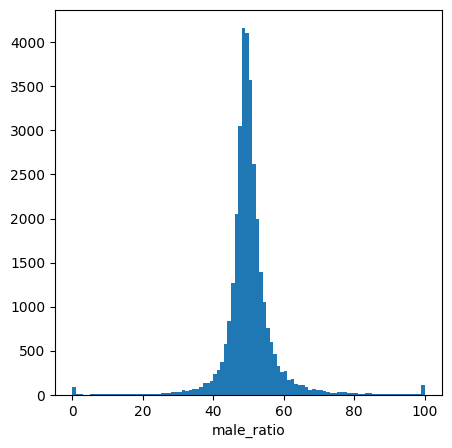

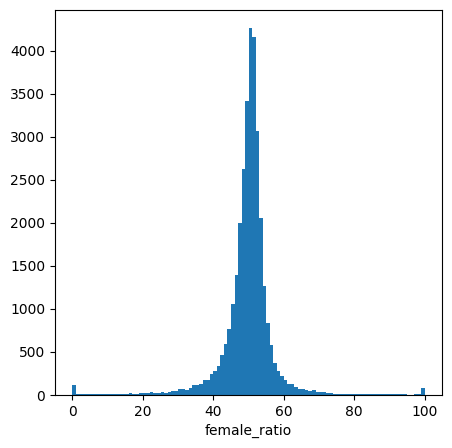

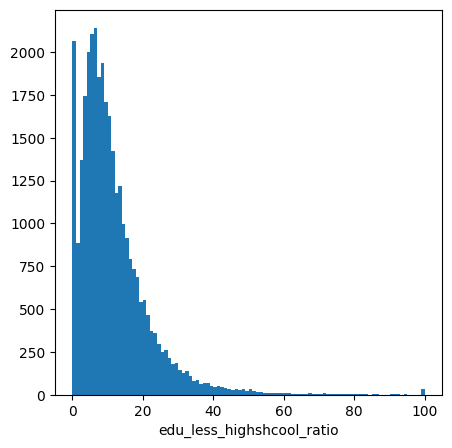

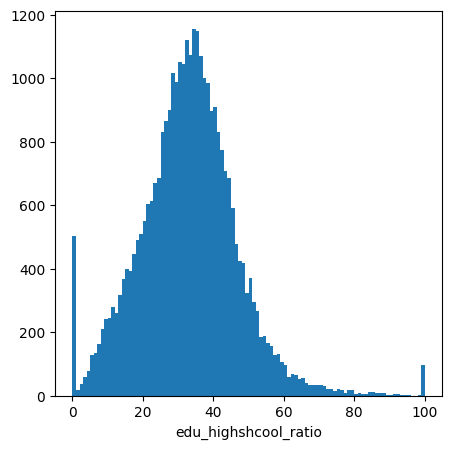

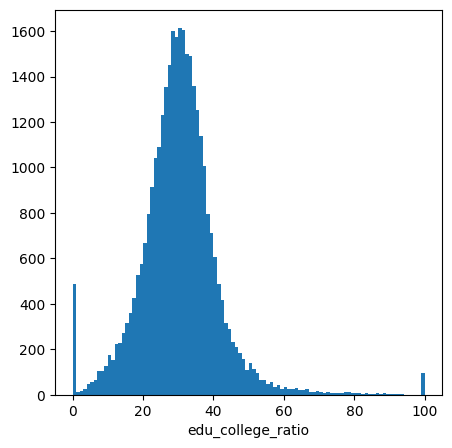

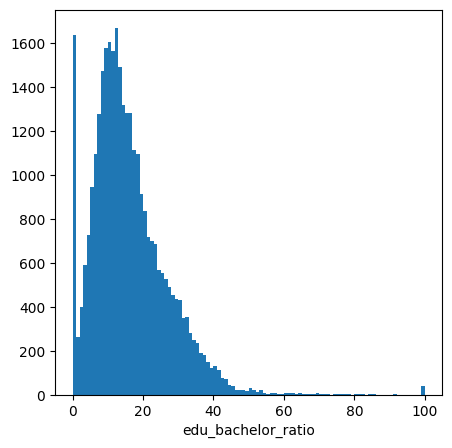

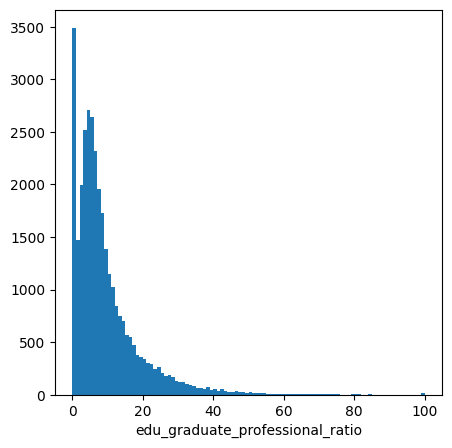

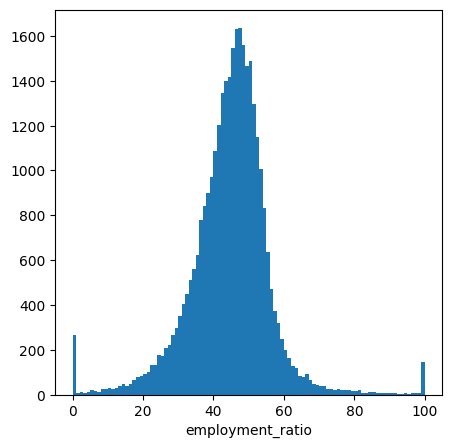

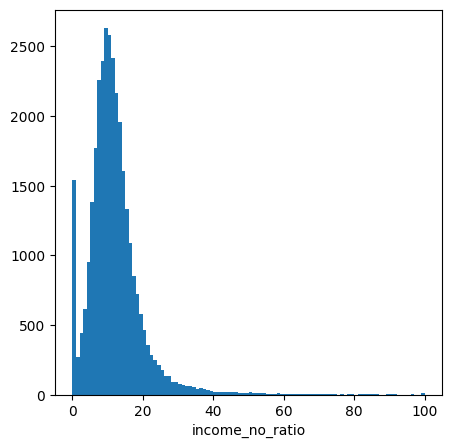

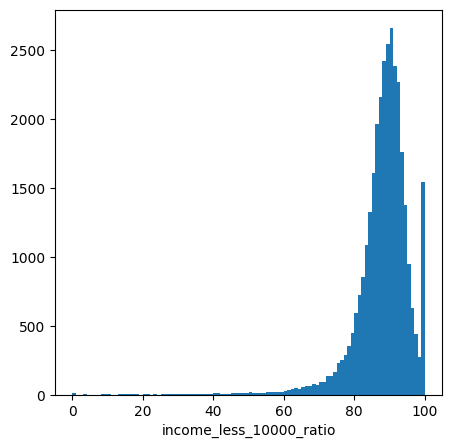

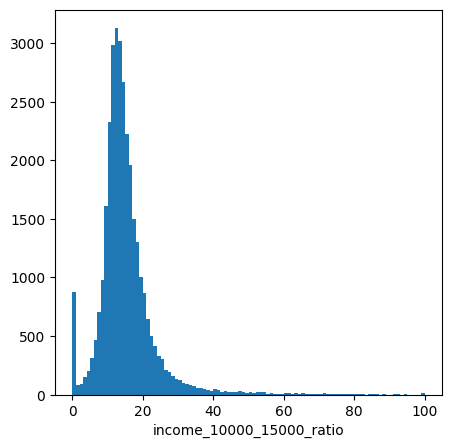

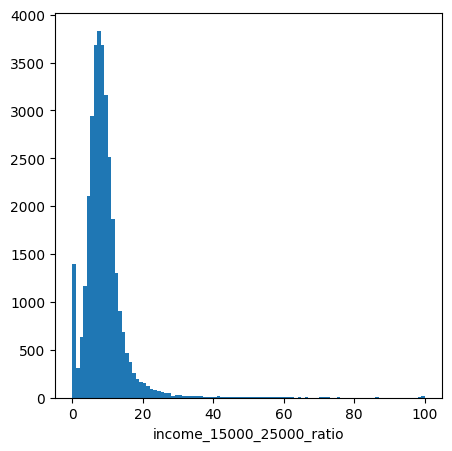

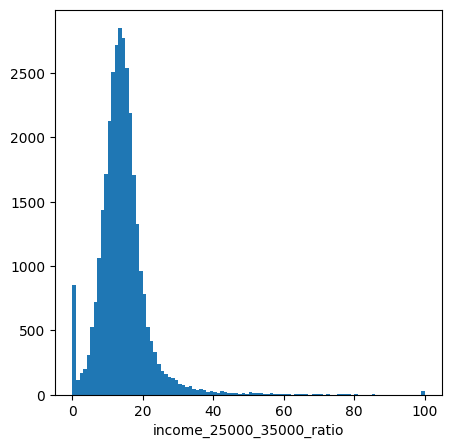

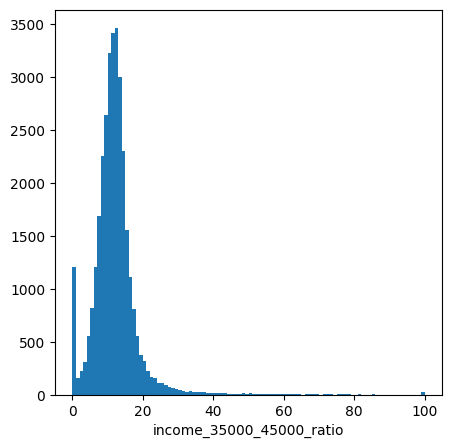

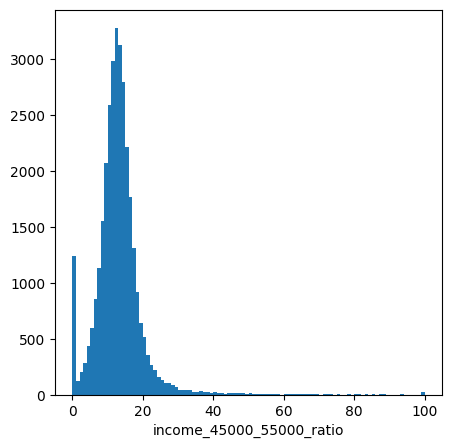

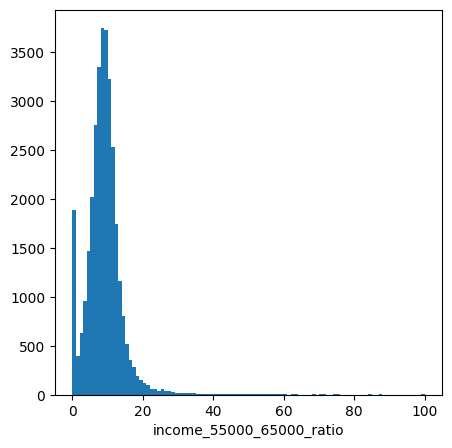

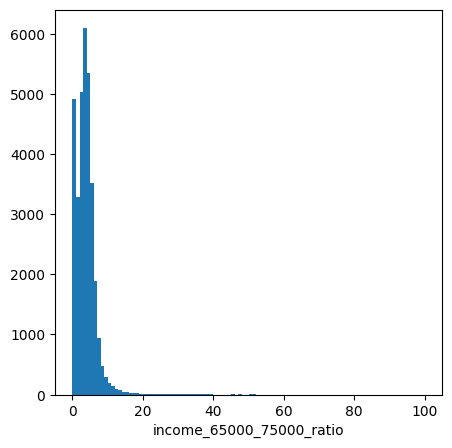

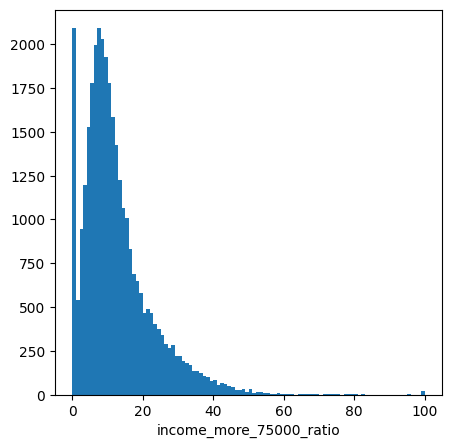

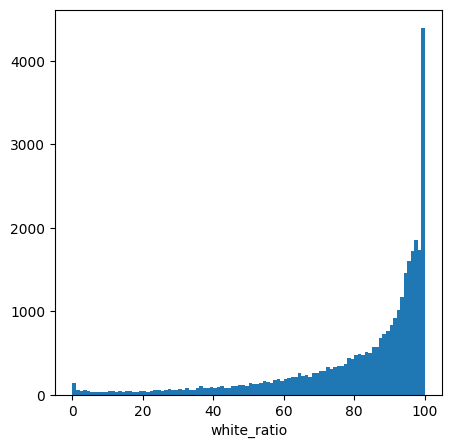

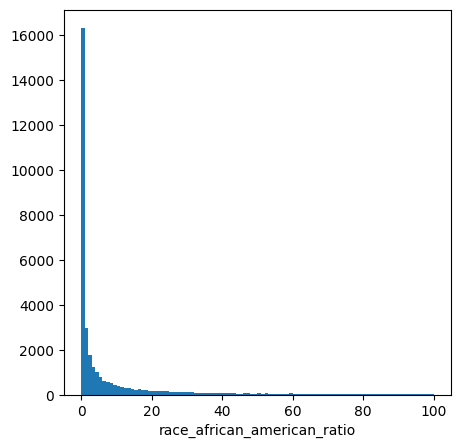

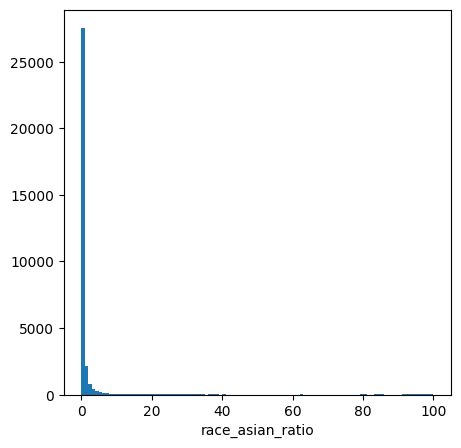

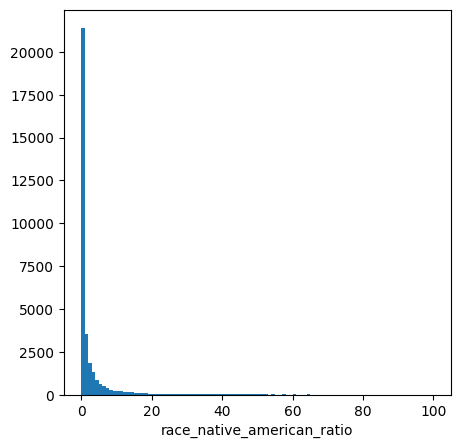

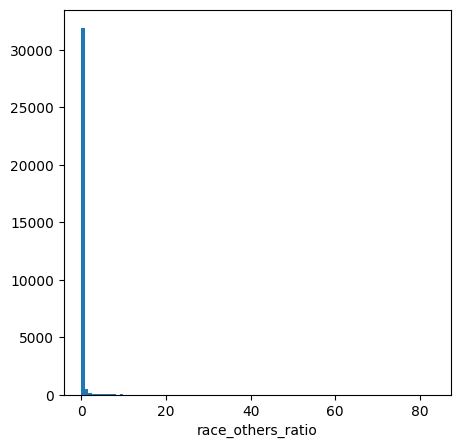

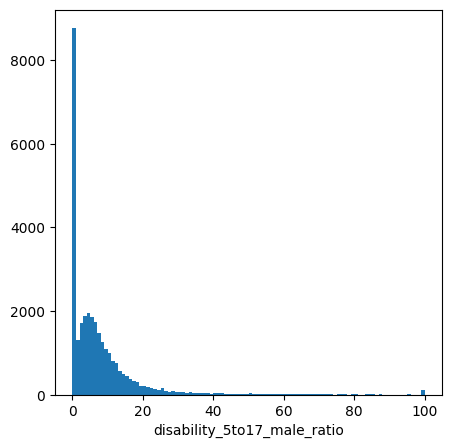

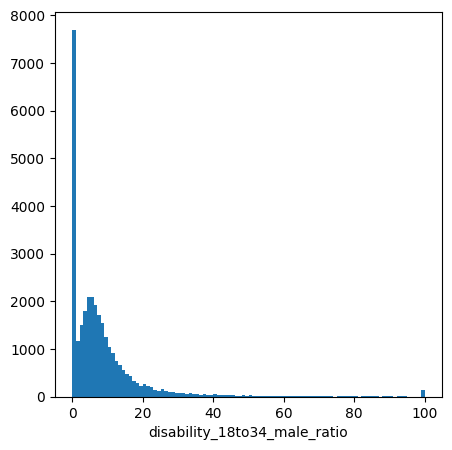

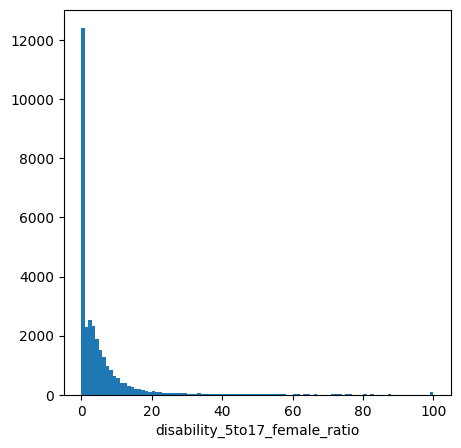

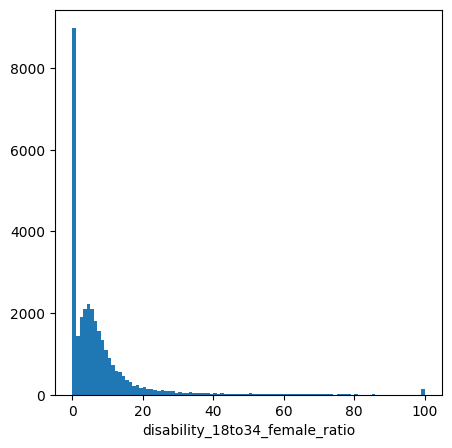

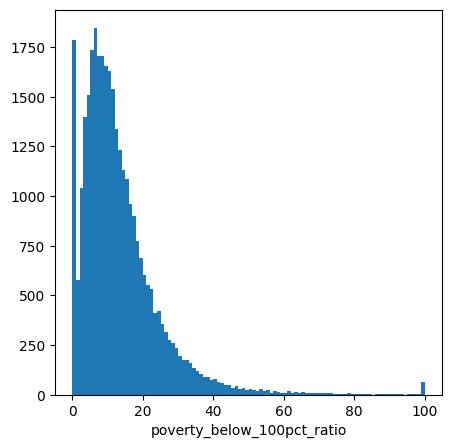

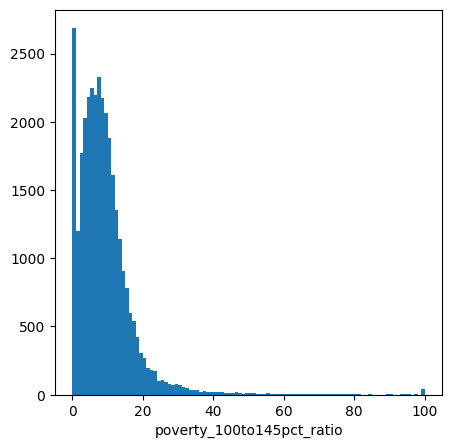

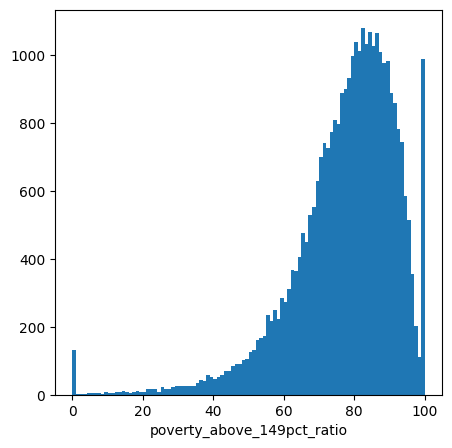

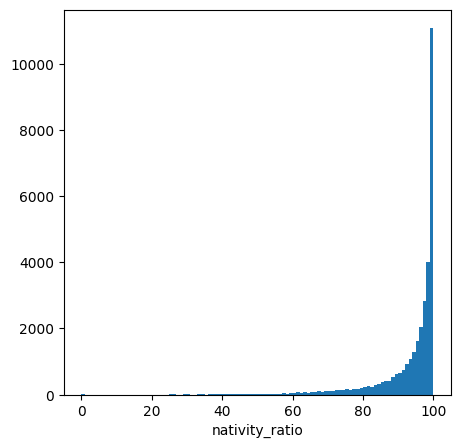

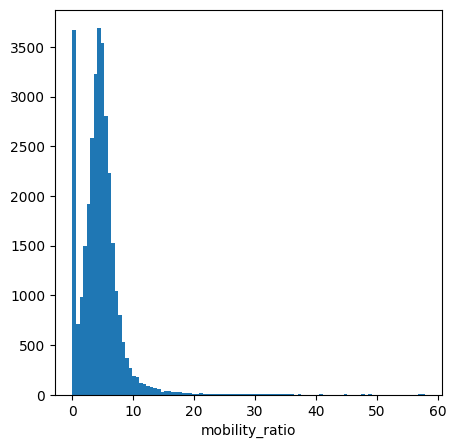

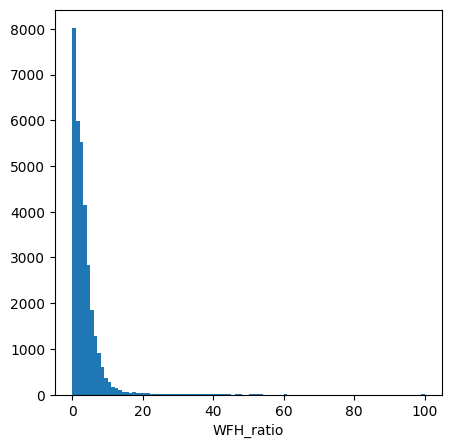

KeyboardInterrupt: 

In [74]:
# Visualize the distribution
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [5,5] 

number_columns = len(df_merged.columns)

for i in range(number_columns) :
    col_name = df_merged.columns[i]  
    x=df_merged[col_name]
    plt.xlabel(col_name)         
    k=plt.hist(x,bins=100)      
    plt.show()